<a href="https://colab.research.google.com/github/mapmatters/GAN_tutorial/blob/master/02_01_deep_learning_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/rickiepark/GDL_code.git

Cloning into 'GDL_code'...
remote: Enumerating objects: 480, done.
remote: Total 480 (delta 0), reused 0 (delta 0), pack-reused 480
Receiving objects: 100% (480/480), 178.44 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (224/224), done.
Checking out files: 100% (77/77), done.


Text(0.5, 0.98, 'figure title')

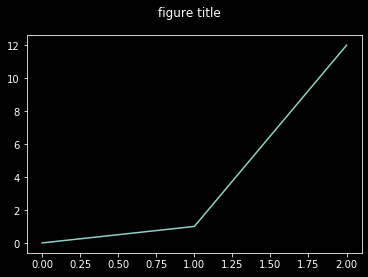

In [24]:
import os
os.chdir("/content/GDL_code")

plt.style.use(['dark_background'])
plt.plot([0,1,12])
plt.suptitle('figure title', color='w')

In [3]:
# !pip install -r requirements.txt

     |████████████████████████████████| 102kB 2.7MB/s 
     |████████████████████████████████| 706kB 7.8MB/s 
     |████████████████████████████████| 10.6MB 13.0MB/s 
     |████████████████████████████████| 2.8MB 48.1MB/s 
     |████████████████████████████████| 122kB 59.1MB/s 
     |████████████████████████████████| 778kB 42.1MB/s 
     |████████████████████████████████| 112kB 49.0MB/s 
     |████████████████████████████████| 184kB 49.3MB/s 
     |████████████████████████████████| 133kB 42.8MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
     |████████████████████████████████| 133kB 55.6MB/s 
     |████████████████████████████████| 317kB 20.2MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 952kB 53.9MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |████████████████████████████████| 12.9MB 25.6MB/s 
     |████████████████████████████████| 409kB 31.6MB/s

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

from keras.datasets import cifar10

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

### load data

In [0]:
NUM_CLASSES = 10

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [8]:
x_train[52,12,13,1]

0.43137255

# build model

In [9]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## compile model

In [0]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

## training model

In [13]:
model.fit(x_train, y_train, batch_size=32
          , epochs=10
          , shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
50000/50000 [==============================] - 22s 434us/step - loss: 1.8563 - acc: 0.3289
Epoch 2/10
50000/50000 [==============================] - 22s 439us/step - loss: 1.6687 - acc: 0.4041
Epoch 3/10
50000/50000 [==============================] - 22s 434us/step - loss: 1.5868 - acc: 0.4322
Epoch 4/10
50000/50000 [==============================] - 22s 436us/step - loss: 1.5355 - acc: 0.4500
Epoch 5/10
50000/50000 [==============================] - 21s 428us/step - loss: 1.4979 - acc: 0.4648
Epoch 6/10
50000/50000 [==============================] - 21s 426us/step - loss: 1.4638 - acc: 0.4797
Epoch 7/10
50000/50000 [==============================] - 22s 440us/step - loss: 1.4371 - acc: 0.4887
Epoch 8/10
50000/50000 [==============================] - 22s 436us/step - loss: 1.4135 - acc: 0.4977
Epoch 9/10
50000/50000 [==============================] - 22s 432us/step - loss: 1.3939 - acc: 0.5054
Epoch 10/10
50000/50000 [=========

## 모델 평가

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 100us/step


[1.4576793224334716, 0.4805]

In [0]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis= -1)]

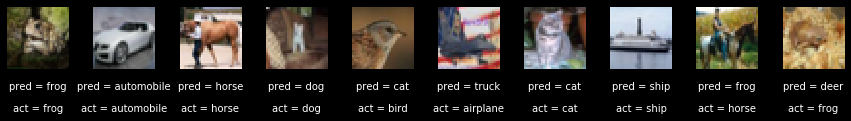

In [26]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center',
          transform=ax.transAxes)
  ax.imshow(img)